In [1]:
from  bped2.pedigree import Pedigree
import bped2.view as pview


In [2]:
ped = Pedigree()
ped.gen_ped('multi',3,2,4,2)
ped

In [5]:
ped.insert_name({'1':'Paul','2':'Jacques'})
ped.get_pedigree().keys()

dict_keys(['1', '2', '3'])

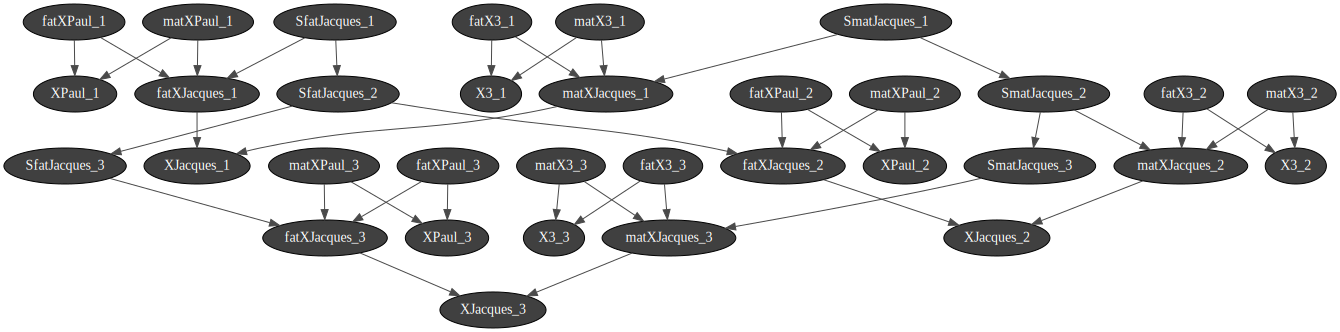

In [4]:
bn = pview.bn_multi_pb(ped, 0.05, 3,[0.8,0.7])
pview.gnb.showBN(bn, size=100)


In [5]:
bn.cpt('Sfat2_1')

(gum::Potential<double>@0x5613d9f4a6e0) <Sfat2_1:fat> :: 0.5 /<Sfat2_1:mat> :: 0.5

In [6]:
bn.cpt('Sfat2_2')

(gum::Potential<double>@0x5613d94103a0) <Sfat2_2:fat|Sfat2_1:fat> :: 0.2 /<Sfat2_2:mat|Sfat2_1:fat> :: 0.8 /<Sfat2_2:fat|Sfat2_1:mat> :: 0.8 /<Sfat2_2:mat|Sfat2_1:mat> :: 0.2

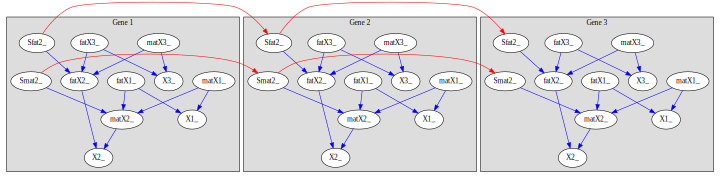

In [7]:
pview.graph_multi(bn,10)

In [4]:
evidence = pview.load_evidence_multi('../data/multi.ev','0')
evidence

0 oooo 0	1_1	0	1	1	1

1 oooo 0	1_2	1	0	0	0

2 oooo 0	1_3	0	1	1	1



{'X1_1': [0.0, 1.0, 1.0, 1.0],
 'X1_2': [1.0, 0.0, 0.0, 0.0],
 'X1_3': [0.0, 1.0, 1.0, 1.0]}

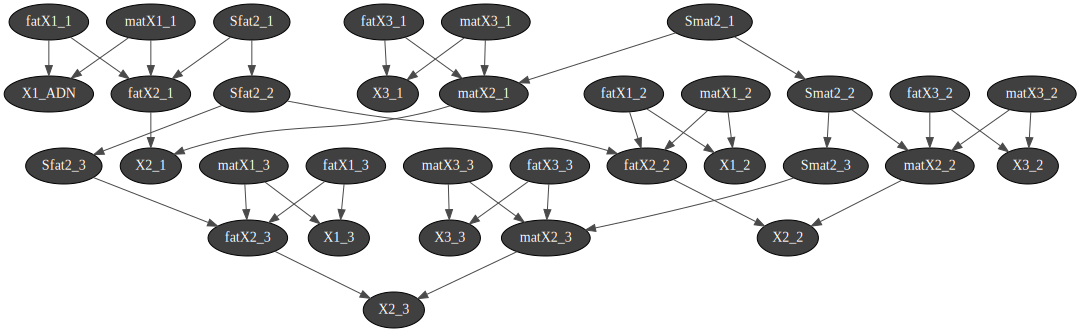

In [4]:
bn.changeVariableName('X1_1','X1_ADN')
pview.gnb.showBN(bn, size=100)


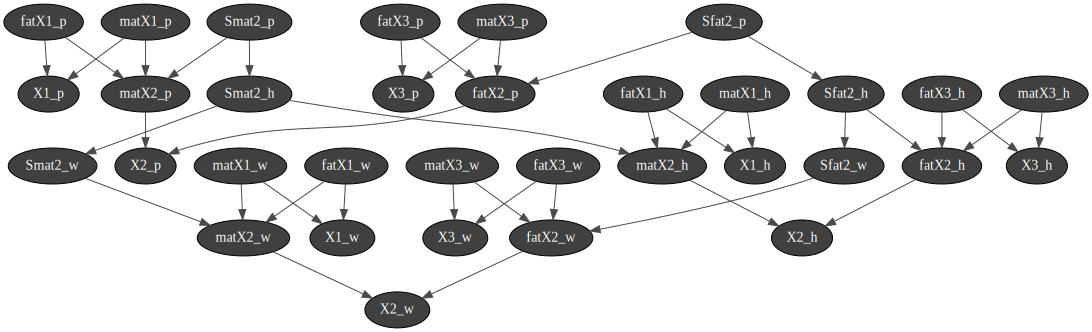

In [5]:
bn = pview.bn_multi_pb(ped, 0.05, 3,[0.8,0.7],['p','h','w'])
pview.gnb.showBN(bn, size=100)